In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import sys
import os
from funcs import *
from simulator import *
import seaborn as sns

In [2]:
def score_geral(namefile, max_time=3, old_schedule=None):
    entrada = open(f'in/{namefile}.txt', 'r')
    saida = open(f'out/{namefile}.out', 'w')

    D,I,S,V,F, sts, cars, inters = pega_input(entrada.readline)
    #import pdb; pdb.set_trace()
    schedule = sol_batata(D,I,S,V,F, sts, cars, inters, max_time=max_time, old_schedule=old_schedule)
    
    new_old_schedule = schedule.copy()
    try:
        output = form_out(schedule)[:-1]
    except:
        import pdb; pdb.set_trace()
    bkp_cars = cars.copy()
    
    total, finished_cars = score(D, F, sts, cars, inters, schedule)
    #print(f'score: {total:,}')
    return cars, bkp_cars, finished_cars, total, sts, inters, schedule, total, new_old_schedule

In [3]:
# Cada linha é um carro, cada coluna é uma estatística do carro
def data_car(cars, sts, bkp_cars):
    data = []
    cars.update(finished_cars)
    for car in cars:
        #print(cars[car])
        path = bkp_cars[car]#['path']
        qtde_ruas = len(path)# - 1
        
        total_tam_ruas = 0
        for st in path[1:]:
            dims = sts[st]['size']
            tam_rua = dims[2]
            total_tam_ruas += tam_rua
            #print(f'rua {st} : {dims}')
            
        ruas_intersec = 0
        for car2 in cars:
            path1 = set(path)      
            
            path2 = bkp_cars[car2]#['path']
            #qtde_ruas = len(path2) - 1
            path2 = set(path2)
            
            intersecs = len(path1.intersection(path2))
            ruas_intersec += intersecs
            
        sts_with_intersect = 0#{}
        for st in path:
            #st_has_intersect[st] = False 
            for car2 in cars:
                path = bkp_cars[car]#['path'] 
                if st in path:
                    #st_has_intersect[st] = True
                    sts_with_intersect += 1
                    break
        #print('sthasinter', st_has_intersect)
        score_car = cars[car]['score']
        #print(f'{car} : ruas: {qtde_ruas}, tamanhototal: {total_tam_ruas}')
        data.append([ car, qtde_ruas, total_tam_ruas, ruas_intersec, sts_with_intersect, score_car ])
    df = pd.DataFrame(data, columns=['Carro', 'Ruas', 'Tamanho total', 'Ruas em comum', 'Ruas com intersec', 'Score'])
    display(df.describe())
    #print(bkp_cars)
    #print(schedule)
    return df
cars, bkp_cars, finished_cars, total, sts, inters, schedule, total, _ = score_geral("e")
df = data_car(cars, sts, bkp_cars)

new_schedule[0] = [{'st': 'eji-a', 't': 2}]
new_schedule[1] = [{'st': 'a-b', 't': 2}, {'st': 'ejj-b', 't': 2}]
new_schedule[2] = [{'st': 'b-c', 't': 3}]
new_schedule[3] = [{'st': 'c-d', 't': 3}, {'st': 'ejj-d', 't': 1}]
new_schedule[4] = [{'st': 'd-e', 't': 1}]
new_schedule[5] = [{'st': 'e-f', 't': 1}, {'st': 'ejj-f', 't': 3}]
new_schedule[6] = [{'st': 'f-g', 't': 3}]
new_schedule[7] = [{'st': 'g-h', 't': 1}, {'st': 'ejj-h', 't': 1}]
new_schedule[8] = [{'st': 'h-i', 't': 2}]
new_schedule[9] = [{'st': 'i-j', 't': 1}, {'st': 'ejj-j', 't': 3}]
new_schedule[10] = [{'st': 'j-ba', 't': 2}]
new_schedule[11] = [{'st': 'ba-bb', 't': 1}, {'st': 'ejj-bb', 't': 3}]
new_schedule[12] = [{'st': 'bb-bc', 't': 3}]
new_schedule[13] = [{'st': 'bc-bd', 't': 3}, {'st': 'ejj-bd', 't': 3}]
new_schedule[14] = [{'st': 'bd-be', 't': 1}]
new_schedule[15] = [{'st': 'be-bf', 't': 2}, {'st': 'ejj-bf', 't': 3}]
new_schedule[16] = [{'st': 'bf-bg', 't': 1}]
new_schedule[17] = [{'st': 'bg-bh', 't': 2}, {'st': 'ejj-bh',

,Carro,Ruas,Tamanho total,Ruas em comum,Ruas com intersec,Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,1.747000,36.721000,5.725000,1.747000,631.285000
std,288.819436,1.699376,86.269587,5.888637,1.699376,417.608396
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,249.750000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,499.500000,1.000000,0.000000,4.000000,1.000000,754.500000
75%,749.250000,1.000000,0.000000,6.000000,1.000000,975.250000
max,999.000000,10.000000,553.000000,43.000000,10.000000,1173.000000


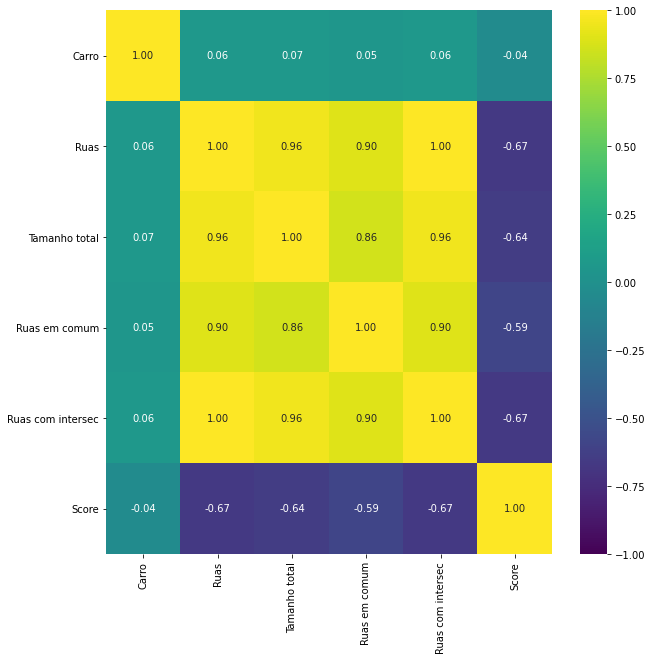

In [4]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1);

In [5]:
def data_sts(sts, cars, bkp_cars, inters):  
    data = []
    for st in sts:
        #print(sts[st])
        cars_with_st = 0
        score_st = 0
        for car in bkp_cars:
            if(st in set(bkp_cars[car])):
                cars_with_st += 1
                score_st += cars[car]['score']
        aux = sts[st]['size']
        tam_st = aux[2]
        coming = aux[0]
        going = aux[1]
        qtd_desembocam = len(inters[coming]['sts'])

        data.append([cars_with_st, tam_st, coming, going, qtd_desembocam, score_st])
    df_st = pd.DataFrame(data, columns=['Carros que passam por essa rua', 'Tamanho da Rua', 'Vem de', 'Vai para', 
            'Quantidade de ruas que desembocam nela', 'Score dos que passaram'])
    display(df_st.describe())
    return df_st
df_st = data_sts(sts, cars, bkp_cars, inters)

,Carros que passam por essa rua,Tamanho da Rua,Vem de,Vai para,Quantidade de ruas que desembocam nela,Score dos que passaram
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,1.750501,50.595190,311.374749,311.625251,63.374749,632.550100
std,1.635512,28.469034,165.300164,165.206086,107.658911,887.272814
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,26.000000,166.000000,166.250000,1.000000,0.000000
50%,1.000000,50.000000,332.000000,332.500000,1.000000,0.000000
75%,3.000000,75.000000,498.000000,498.750000,2.000000,1046.000000
max,9.000000,100.000000,499.000000,499.000000,250.000000,4976.000000


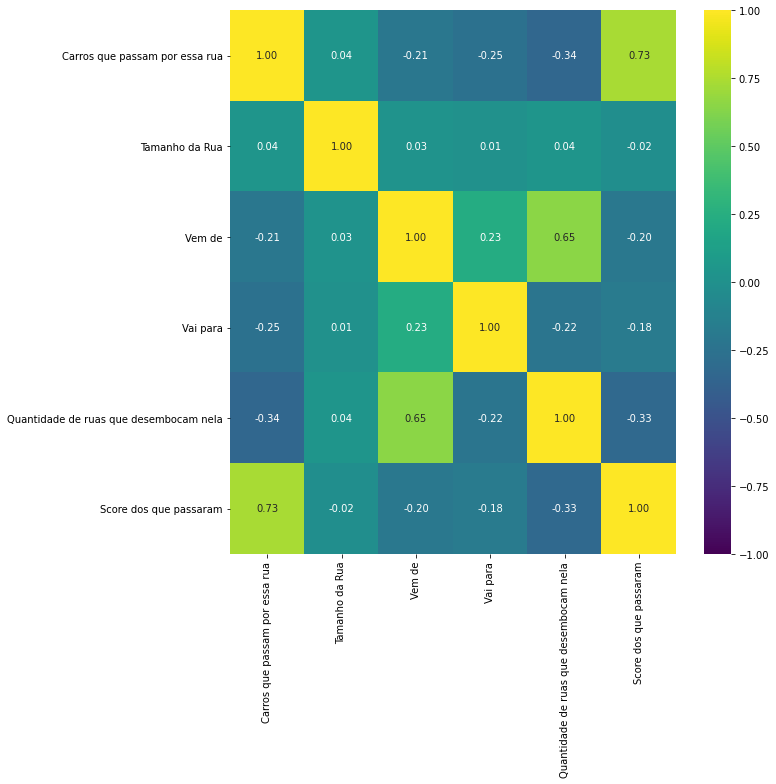

In [6]:
plt.figure(figsize=(10, 10))
corr = df_st.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='viridis', vmin=-1, vmax=1);
#print(bkp_cars)

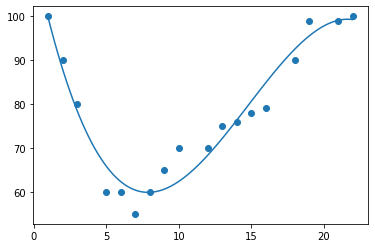

In [7]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

speed = mymodel(17)

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

#print(speed) 

In [8]:
def transform_schedule(schedule, score_t): 
    new_schedule = {}
    for _, value in schedule.items():
        progs = value['prog'].copy()
        for prog in progs:
            st_name = prog['st']
            t = prog['t']
            #prog['score'] = score
            new_schedule[st_name] = {'t': t, 'score': score_t}
    return new_schedule
#transform_schedule(schedule, total)

In [9]:
#dic = {}
import json

def get_dataset(name, n_samples=1, max_time=3, old_schedule=None):
    X, y = [], []
    schedules = []
    for t in range(0, n_samples):
        cars, bkp_cars, finished_cars, total, sts, inters, schedule, total, new_old_schedule = score_geral(name, 
                                                                                         max_time=max_time, 
                                                                                        old_schedule=old_schedule)
        
        schedules.append( new_old_schedule.copy() )
        schedule = transform_schedule(schedule, total)
        #print(schedule)
        row_in = []
        row_out = 0
        for _, value in schedule.items():
            row_in.append(value['t'])
            row_out = value['score']
            
        X.append(row_in)
        y.append(row_out)
        
        #print(f'{t} foi')
    
    #st_schedules = [json.dumps(schedule) for schedule in schedules]
    #st_schedules = pd.DataFrame(data=st_schedules, columns=['schedule'])
    #print('st_schedules = ', st_schedules)
    known_schedules = set()
    not_duplicate_schedules = []
    for schedule in schedules.copy():
        st_schedule = str(schedule)
        if st_schedule not in known_schedules:
            known_schedules.add(st_schedule)
            not_duplicate_schedules.append( schedule.copy() )
    #import pdb; pdb.set_trace()
            
        
    X = pd.DataFrame(X)
    y = pd.DataFrame(data=y, columns=['score'])
    
    # Proximo episodio: juntar X com y e tirar duplicatas
    z = pd.concat([X, y], axis=1)
    z.drop_duplicates(inplace=True)
    #print(z.shape)
    
    n_cols = z.shape[1]
    col_names = [i for i in range(n_cols)]
    z.set_axis(col_names, axis=1)

    #st_schedules = z[['schedule']]
    y = z[['score']]
    X = z.drop(columns=['score'])
    
    #import ast
    #schedules = []
    #l = list(st_schedules['schedule'])
    #print('list schdules: ', l)
    #print('tam: ', len(l))
    #for st_schedule in l:
    #    print('item da lista')
    #    schedule = {}#json.dumps(json.dumps(st_schedule, indent=4), indent=4)
    #    print('schedule reconstruido: ', schedule)
    #    schedules.append(schedule)
    #print('schedules = ', schedules)
    
    return X, y, not_duplicate_schedules

X, y, not_duplicate_schedules = get_dataset('a', n_samples=1000)#[2]#.describe()
#X.shape, y.shape, len(not_duplicate_schedules), not_duplicate_schedules
#z[['score']]
#X.describe(), y.describe()

new_schedule[0] = [{'st': 'rue-de-londres', 't': 3}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 1}, {'st': 'rue-d-athenes', 't': 3}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 1}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 3}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 1}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 2}, {'st': 'rue-d-athenes', 't': 1}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 1}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 1}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 3}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 1}, {'st': 'rue-d-athenes', 't': 3}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 2}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 3}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 2}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 2}, {'st': 'rue-d-athenes', 't': 3}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 2}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 1}]
new_schedule[0] = [{'st': 'rue-d

new_schedule[0] = [{'st': 'rue-de-londres', 't': 1}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 1}, {'st': 'rue-d-athenes', 't': 1}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 2}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 3}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 3}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 1}, {'st': 'rue-d-athenes', 't': 3}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 1}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 1}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 3}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 2}, {'st': 'rue-d-athenes', 't': 1}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 3}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 3}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 2}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 2}, {'st': 'rue-d-athenes', 't': 3}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 2}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 1}]
new_schedule[0] = [{'st': 'rue-d

new_schedule[0] = [{'st': 'rue-de-londres', 't': 1}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 3}, {'st': 'rue-d-athenes', 't': 3}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 3}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 3}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 2}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 3}, {'st': 'rue-d-athenes', 't': 3}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 3}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 1}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 3}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 3}, {'st': 'rue-d-athenes', 't': 2}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 1}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 1}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 2}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 3}, {'st': 'rue-d-athenes', 't': 3}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 2}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 1}]
new_schedule[0] = [{'st': 'rue-d

In [10]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
linhas = 2
variaveis = 2
X = np.arange(linhas * variaveis).reshape(linhas, variaveis)

y = [[1, 3], [2,1]]
deg = 3

poly = PolynomialFeatures(deg)
print(poly.fit_transform(X, y), '\n')



poly = PolynomialFeatures(deg, interaction_only=False)
print(poly.fit_transform(X))


[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]] 

[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [11]:
print(poly.powers_)

[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]]


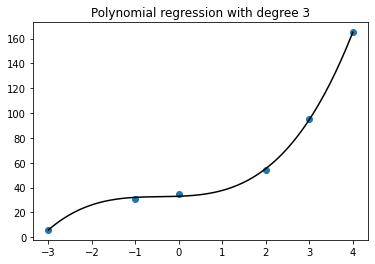

In [12]:
import pandas as pd
#xdic={'X': {11: 300, 12: 170, 13: 99, 14: }} 
#ydic={'y': {11: 305000, 12: 270000}}

def pol(x):
    x = x + random.random()
    return (x*x*x + 3*x + 34 )

xdic = [-3, -1, 0, 4, 3, 2]#, [-3, -1, 0, 4, 3, 2]]
ydic = [pol(el)for el in xdic] #,  [pol(el)for el in xdic[1]]]
X = pd.DataFrame.from_dict(xdic)
y = pd.DataFrame.from_dict(ydic)

import numpy as np4
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1,1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVC

degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X,y)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [13]:
# example of a multi-output regression problem
#from sklearn.datasets import make_regression
# create dataset
#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=3, random_state=2)
# summarize shape
#print(X.shape, y.shape)

In [14]:
pd.DataFrame(X).head()

,0
0,-3
1,-1
2,0
3,4
4,3


In [15]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(20, input_dim=10, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
# get the dataset
#def get_dataset():
	#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=3, random_state=2)
	
#    return X, y

In [18]:
# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mae', optimizer='adam')
	return model

In [19]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
    results = list()
    print('corno')
    print(X.shape)
    print(y.shape)
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    #for train_ix, test_ix in cv.split(X):
    #    print('SO VOU PASSAR  UMA VEZ')
        # prepare data
    #    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]#X[train_ix], X[test_ix]
    #    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        
        # define model
    model = get_model(n_inputs, n_outputs)
        
        # fit model
    model.fit(X, y, verbose=0, epochs=100)
        
        # evaluate model on test set
    #    mae = model.evaluate(X_test, y_test, verbose=0)
        
        # store result
    #    print('>%.1f' % mae)
    #    results.append(mae)
        
    #import pdb; pdb.set_trace()
    return results

In [20]:
def find_max_score_random(max_time=3, old_schedule=None): 
    # load dataset
    #import pdb; pdb.set_trace()
    X, y, old_schedule = get_dataset('a', n_samples=500, max_time=max_time, old_schedule=old_schedule)

    # evaluate model
    results = evaluate_model(X, y)

    # summarize performance
    #print('MAE: max: %.1f;  media: %.1f +/- (%.1f)' % (max(results), mean(results), std(results)))
    return old_schedule
    
    

In [ ]:
import time

max_sec = 60 * 2 #segundos
start = time.time()
end = time.time()
old_schedule = None
max_time = 10

while end - start <= max_sec:
    old_schedule = find_max_score_random(max_time=max_time, old_schedule=old_schedule)[0]
    
    end = time.time()

new_schedule[0] = [{'st': 'rue-de-londres', 't': 2}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 2}, {'st': 'rue-d-athenes', 't': 2}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 4}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 1}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 6}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 1}, {'st': 'rue-d-athenes', 't': 3}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 1}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 2}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 2}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 8}, {'st': 'rue-d-athenes', 't': 1}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 4}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 2}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 5}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 8}, {'st': 'rue-d-athenes', 't': 3}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 2}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 10}]
new_schedule[0] = [{'st': 'rue-

new_schedule[0] = [{'st': 'rue-de-londres', 't': 6}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 9}, {'st': 'rue-d-athenes', 't': 5}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 8}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 9}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 8}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 5}, {'st': 'rue-d-athenes', 't': 9}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 1}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 3}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 9}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 8}, {'st': 'rue-d-athenes', 't': 5}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 6}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 10}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 8}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 5}, {'st': 'rue-d-athenes', 't': 5}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 9}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 5}]
new_schedule[0] = [{'st': 'rue-

new_schedule[0] = [{'st': 'rue-de-londres', 't': 5}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 9}, {'st': 'rue-d-athenes', 't': 6}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 8}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 4}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 1}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 8}, {'st': 'rue-d-athenes', 't': 3}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 4}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 7}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 6}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 6}, {'st': 'rue-d-athenes', 't': 9}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 8}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 4}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 8}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 3}, {'st': 'rue-d-athenes', 't': 7}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 8}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 8}]
new_schedule[0] = [{'st': 'rue-d

new_schedule[0] = [{'st': 'rue-de-londres', 't': 5}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 2}, {'st': 'rue-d-athenes', 't': 1}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 1}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 1}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 3}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 5}, {'st': 'rue-d-athenes', 't': 6}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 1}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 1}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 1}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 1}, {'st': 'rue-d-athenes', 't': 6}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 1}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 5}]
new_schedule[0] = [{'st': 'rue-de-londres', 't': 1}]
new_schedule[1] = [{'st': 'rue-d-amsterdam', 't': 9}, {'st': 'rue-d-athenes', 't': 5}]
new_schedule[2] = [{'st': 'rue-de-moscou', 't': 1}]
new_schedule[3] = [{'st': 'rue-de-rome', 't': 1}]
new_schedule[0] = [{'st': 'rue-d